In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cycler import cycler
import matplotlib as mpl
from imblearn.under_sampling import RandomUnderSampler

In [45]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#D6E4FA', '#F6C8C6', '#FFF0C9', '#DCCFE2', '#D0E4D0', '#FEE3C8', '#DCCFE2', '#D0E4D0', '#FEE3C8', '#F6C8C6', '#FFF0C9', '#D6E4FA'])
figwidth = 25
figheight = 5

In [46]:
df = pd.read_csv('data/clean.csv')
len(df)

4143

In [48]:
df = df.drop_duplicates()
len(df)

3264

In [49]:
df = df[~df['genus'].isnull()]
len(df)

3263

In [50]:
df = df[~df['species'].isnull()]
len(df)

2837

In [51]:
min_mask = (df['sequence'].str.len() > 500)
max_mask = (df['sequence'].str.len() < 20000)
df = df.loc[min_mask]
df = df.loc[max_mask]
len(df)

1950

In [52]:
df = df.groupby('genus').filter(lambda x: len(x) > 80)
len(df)

1283

In [53]:
df = df[~df['sequence'].isin(df['sequence'][df['sequence'].duplicated()])].sort_values('sequence')

In [54]:
x = df.sequence
y = df.genus

rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(np.array(x).reshape(-1, 1), y)

df = pd.DataFrame({ 'sequence': x_res.flatten(), 'genus': y_res })
len(df)

540

### Data classes by count

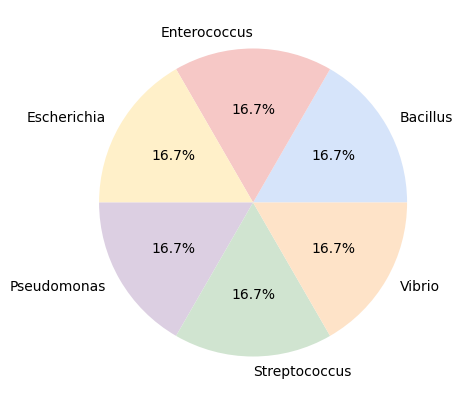

In [56]:
f = plt.figure()
f.set_figwidth(figwidth)
f.set_figheight(figheight)
df1 = df.groupby('genus')['genus'].count()
ax = df1.plot.pie(autopct='%1.1f%%')
ax.yaxis.set_visible(False)

### Data classes by count

<BarContainer object of 6 artists>

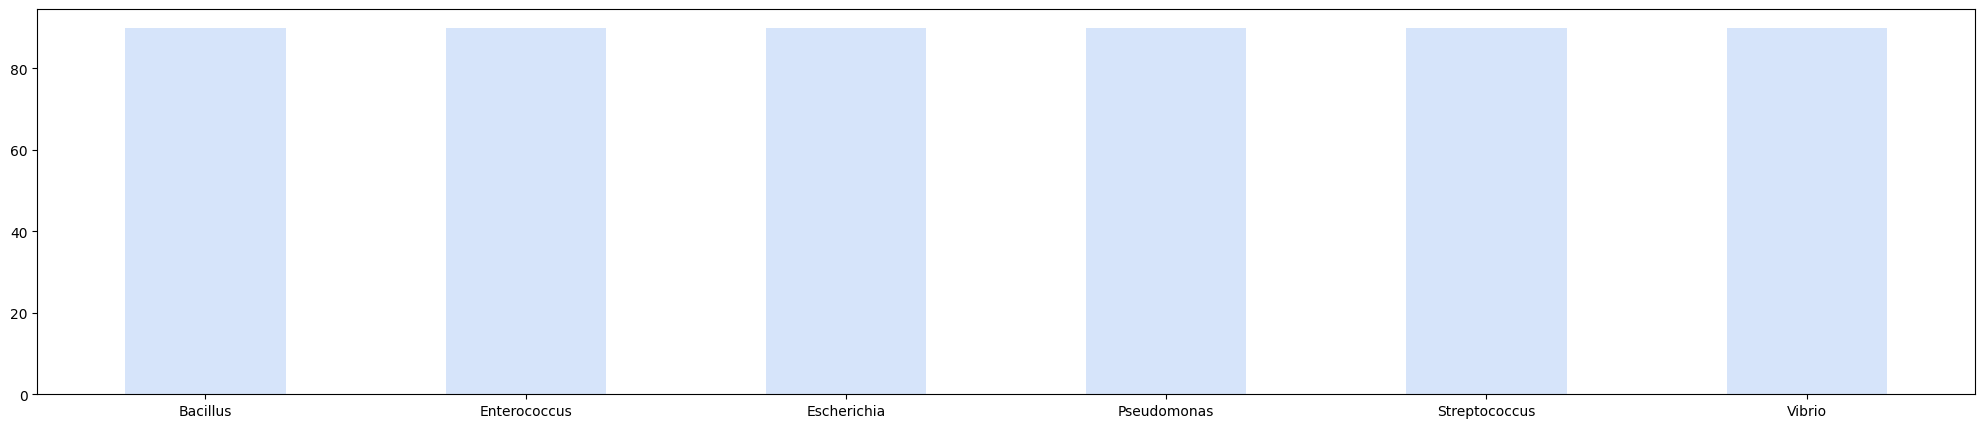

In [57]:
df2 = df.groupby('genus')['sequence'].aggregate([lambda x: x.str.len().min(), lambda x: x.str.len().max()]).reset_index()
df2 = df2.rename(columns={'<lambda_0>': 'min_sequence_length', '<lambda_1>': 'max_sequence_length'})
df2['count'] = df.groupby(['genus'])['genus'].count().reset_index(name='count')['count']

f = plt.figure()
f.set_figwidth(figwidth)
f.set_figheight(figheight)
plt.bar(df2['genus'], df2['count'], width=0.5)